In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.models import Sequential, Model, load_model
from keras import applications
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense
from keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import backend as K
import gc
from keras.models import Model
import pickle

In [3]:
train_dir =r"C:\Users\User\Desktop\MCA 2020-2022\MCA S4 NOTES\MAIN PROJECT\Handwritten-Signature-Verification-Using-CNN-main\sign_data\test" 
test_dir =r"C:\Users\User\Desktop\MCA 2020-2022\MCA S4 NOTES\MAIN PROJECT\Handwritten-Signature-Verification-Using-CNN-main\sign_data\train"

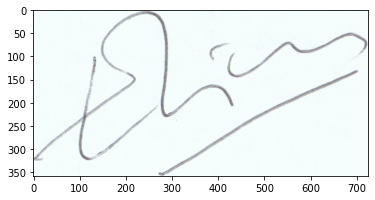

In [4]:
import matplotlib.pyplot as plt
img = plt.imread(r'C:\Users\User\Desktop\MCA 2020-2022\MCA S4 NOTES\MAIN PROJECT\Handwritten-Signature-Verification-Using-CNN-main\sign_data\train/001/001_01.PNG')
plt.imshow(img)

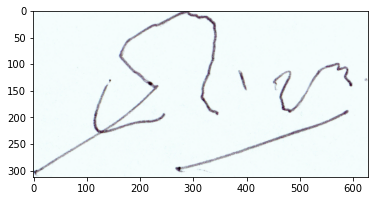

In [5]:
img1 = plt.imread(r'C:\Users\User\Desktop\MCA 2020-2022\MCA S4 NOTES\MAIN PROJECT\Handwritten-Signature-Verification-Using-CNN-main\sign_data\train/001_forg/0119001_01.png')
plt.imshow(img1)

In [7]:
SIZE = 224

In [8]:
import cv2
import os
import glob

train_data_names = []
test_data_names = []

train_data = []
train_labels = []

for per in os.listdir(r'C:\Users\User\Desktop\MCA 2020-2022\MCA S4 NOTES\MAIN PROJECT\Handwritten-Signature-Verification-Using-CNN-main\sign_data\train/'):
    for data in glob.glob(r'C:\Users\User\Desktop\MCA 2020-2022\MCA S4 NOTES\MAIN PROJECT\Handwritten-Signature-Verification-Using-CNN-main\sign_data\train/'+per+'/*.*'):
        train_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir(r'C:\Users\User\Desktop\MCA 2020-2022\MCA S4 NOTES\MAIN PROJECT\Handwritten-Signature-Verification-Using-CNN-main\sign_data\test/'):
    for data in glob.glob(r'C:\Users\User\Desktop\MCA 2020-2022\MCA S4 NOTES\MAIN PROJECT\Handwritten-Signature-Verification-Using-CNN-main\sign_data\test/'+per+'/*.*'):
        test_data_names.append(data)
        img = cv2.imread(data)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (SIZE,SIZE))
        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)

In [9]:
with open('./train_data_names.pkl', 'wb') as fp:
    pickle.dump(train_data_names, fp)

with open('./test_data_names.pkl', 'wb') as fp:
    pickle.dump(test_data_names, fp)

In [10]:
# Categorical labels
train_labels = to_categorical(train_labels)
print(train_data.shape)
# Reshaping
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

(1649, 1, 224, 224, 3)


# Parameters

In [11]:
input_ = (224,224,3)
EPOCHS = 20
BS = 64
output_ = 2

# VGG16 - Adam

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 1537s 80s/step - loss: 0.7222 - accuracy: 0.5737 - val_loss: 0.8759 - val_accuracy: 0.4990
Epoch 2/20
19/19 [==============================] - 1429s 75s/step - loss: 0.6200 - accuracy: 0.6542 - val_loss: 0.6933 - val_accuracy: 0.6485
Epoch 3/20
19/19 [==============================] - 1432s 76s/step - loss: 0.5394 - accuracy: 0.7253 - val_loss: 0.7033 - val_accuracy: 0.6566
Epoch 4/20
19/19 [==============================] - 1423s 75s/step - loss: 0.4037 - accuracy: 0.8172 - val_loss: 0.3293 - val_accuracy: 0.8626
Epoch 5/20
19/19 [==============================] - 1414s 75s/step - loss: 0.3784 - accuracy: 0.8536 - val_loss: 0.2089 - val_accuracy: 0.9172
Epoch 6/20
19/19 [==============================] - 1416s 75s/step - loss: 0.2114 - accuracy: 0.9203 - val_loss: 0.3031 - val_accuracy: 0.9152
Epoch 7/20
19/19 [==============================] - 1410s 74s/step - loss: 0.1465 - accuracy: 0.9428 - val_loss: 0.0818 - val_accuracy: 0.9717

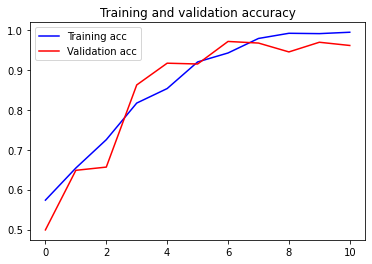

<Figure size 432x288 with 0 Axes>

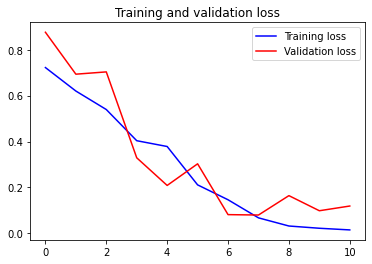

16/16 [==============================] - 149s 9s/step


In [16]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./VGG16_Adam_train', intermediate_output_train)
np.save('./VGG16_Adam_test', intermediate_output_test)

# Inception_v3 - Adam

87910968/87910968 [==============================] - 101s 1us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3_input (InputLa  [(None, 224, 224, 3)]    0         
 yer)                                                            
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_1 (Flatten)         (None, 51200)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               13107456  
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 34,910,754
Trainable params: 34,876,322
Non-

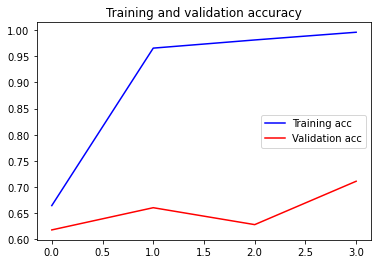

<Figure size 432x288 with 0 Axes>

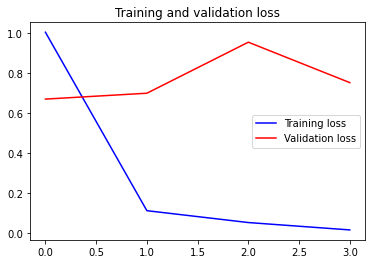

16/16 [==============================] - 35s 2s/step


In [18]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./InceptionV3_Adam_train', intermediate_output_train)
np.save('./InceptionV3_Adam_test', intermediate_output_test)

# ResNet50 - Adam

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
_________________________________________________________________


C:\Users\User\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
19/19 [==============================] - 992s 51s/step - loss: 2.0515 - accuracy: 0.6828 - val_loss: 0.7003 - val_accuracy: 0.4687
Epoch 2/20
19/19 [==============================] - 1870s 101s/step - loss: 0.0741 - accuracy: 0.9783 - val_loss: 0.6854 - val_accuracy: 0.4949
Epoch 3/20
19/19 [==============================] - 1008s 53s/step - loss: 0.0121 - accuracy: 0.9948 - val_loss: 0.7512 - val_accuracy: 0.4990
Epoch 4/20
19/19 [==============================] - 1080s 57s/step - loss: 0.0088 - accuracy: 0.9974 - val_loss: 0.9627 - val_accuracy: 0.5010
Epoch 5/20
19/19 [==============================] - 1010s 53s/step - loss: 0.0426 - accuracy: 0.9870 - val_loss: 0.7776 - val_accuracy: 0.4970
Epoch 5: early stopping


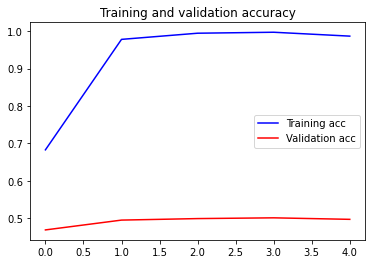

<Figure size 432x288 with 0 Axes>

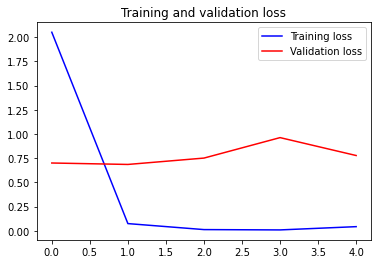

16/16 [==============================] - 62s 4s/step


In [11]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./ResNet50_Adam_train', intermediate_output_train)
np.save('./ResNet50_Adam_test', intermediate_output_test)


# Xception - Adam

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 256)               25690368  
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 46,552,362
Trainable params: 46,497,834
Non-trainable params: 54,528
_________________________________________________________________
Epoch 1/20
19/19 [==========================

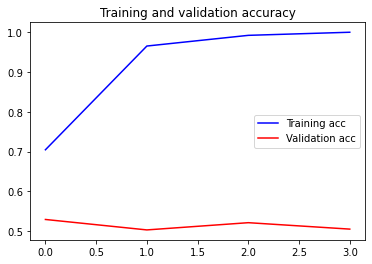

<Figure size 432x288 with 0 Axes>

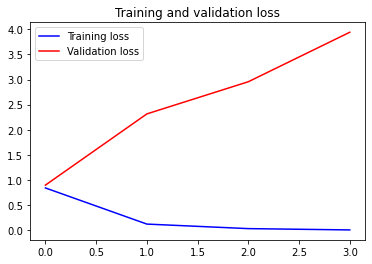

16/16 [==============================] - 82s 5s/step


In [12]:
base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

model.summary()

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

early_stop=[earlyStopping]
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=early_stop,validation_split=.3)
acc = progess.history['accuracy']
val_acc = progess.history['val_accuracy']
loss = progess.history['loss']
val_loss = progess.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.layers[-2].output)
intermediate_output_train = intermediate_layer_model.predict(train_data)
intermediate_output_test = intermediate_layer_model.predict(test_data)

np.save('./Xception_Adam_train', intermediate_output_train)
np.save('./Xception_Adam_test', intermediate_output_test)
